# Testing Predictions of the variants of MILD

v1_1/diaghmm_z3h5 50	4.2359e-03 ± 6.2540e-03 	1.3201e-03 ± 9.2491e-04
v1_1/diaghmm_z3h5 60	4.2362e-03 ± 6.3225e-03 	1.2813e-03 ± 9.3006e-04
v1_1/diaghmm_z3h5 70	4.1755e-03 ± 6.2919e-03 	1.2248e-03 ± 8.8677e-04
v1_1/diaghmm_z3h5 80	4.1627e-03 ± 6.2393e-03 	1.2139e-03 ± 8.7136e-04
v1_1/diaghmm_z3h5 90	4.2435e-03 ± 6.2946e-03 	1.2267e-03 ± 8.8184e-04
v1_1/diaghmm_z3h5 100	4.2367e-03 ± 6.2869e-03 	1.2224e-03 ± 8.6947e-04
v2_1/diaghmm_z3h5 50	4.1876e-03 ± 6.2892e-03 	1.2637e-03 ± 9.4043e-04
v2_1/diaghmm_z3h5 60	4.1768e-03 ± 6.3031e-03 	1.2456e-03 ± 9.0780e-04
v2_1/diaghmm_z3h5 70	4.2949e-03 ± 6.3877e-03 	1.3236e-03 ± 9.2378e-04
v2_1/diaghmm_z3h5 80	4.1963e-03 ± 6.3576e-03 	1.2214e-03 ± 8.9961e-04
v2_1/diaghmm_z3h5 90	4.1982e-03 ± 6.3603e-03 	1.2087e-03 ± 8.8842e-04
v2_1/diaghmm_z3h5 100	4.2156e-03 ± 6.3374e-03 	1.2241e-03 ± 9.0192e-04
v2_2/diaghmm_z3h5 50	4.2317e-03 ± 6.3285e-03 	1.3249e-03 ± 9.3056e-04
v2_2/diaghmm_z3h5 60	4.2378e-03 ± 6.3739e-03 	1.2709e-03 ± 9.0382e-04
v2_2/diaghmm_z3h5 

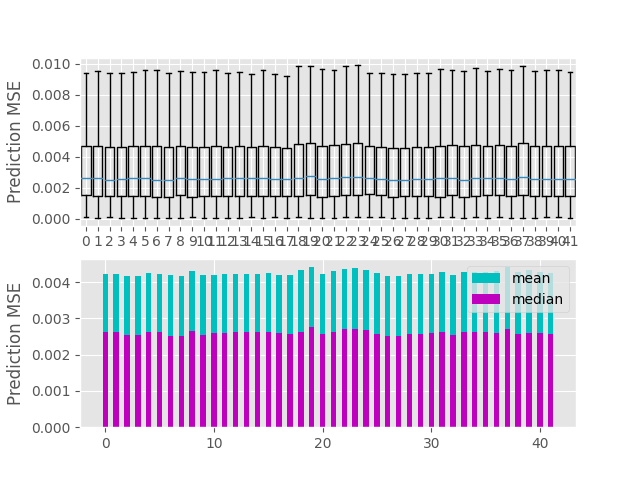

In [3]:
%matplotlib widget
import numpy as np
import scipy
import matplotlib.pyplot as plt
import torch
import os

from mild_hri.utils import *
from mild_hri.dataloaders import *


os.environ['CUDA_VISIBLE_DEVICES'] = '0'

fig = plt.figure()
plt.title('MSE of predicted robot joints after observing human')
ax_box_pred = plt.subplot(2,1,1)
# ax_box_vae = plt.subplot(2,2,2)
ax_bar_pred = plt.subplot(2,1,2)
# ax_bar_vae = plt.subplot(2,2,4)
k = 0

pred_mse = []
labels = []
vae_mse = []
for model_type in [
						'v1_1/diaghmm_z3h5',
						'v2_1/diaghmm_z3h5',
						'v2_2/diaghmm_z3h5',
						'v3_1/diaghmm_z3h5',
						'v3_2/diaghmm_z3h5',
						'v4_1/diaghmm_z3h5',
						'v4_2/diaghmm_z3h5',
					]:
	for epoch in range(50,101,10):
		pred_mse_k = []
		vae_mse_k = []
		for trial in range(4):
			ckpt_path = f'../logs/2023/bp_hh_20hz/{model_type}/trial{trial}/models/' + ('%0.3d'%epoch) + '.pth'
			ckpt = torch.load(ckpt_path)
			pred_mse_ckpt, vae_mse_ckpt = evaluate_ckpt_hh(ckpt_path)
			if np.any(np.isnan(pred_mse_ckpt)):
				print(model_type, trial)
				continue
			pred_mse_k += pred_mse_ckpt
			vae_mse_k += vae_mse_ckpt
		pred_mse.append(pred_mse_k)
		vae_mse.append(vae_mse_k)
		labels.append(f'{model_type}_epoch{epoch}')
		
		print(f'{model_type} {epoch}\t{np.mean(pred_mse_k):.4e} ± {np.std(pred_mse_k):.4e} \t{np.mean(vae_mse_k):.4e} ± {np.std(vae_mse_k):.4e}')

# p_values = np.ones((len(pred_mse), len(pred_mse)))
# for i in range(len(pred_mse)-1):
#     for j in range(i+1,len(pred_mse)):
#         p_values[i,j] = scipy.stats.ttest_ind(pred_mse[i], pred_mse[j]).pvalue
#         print(i,j,p_values[i,j])

# p_values = np.ones((len(pred_mse), len(pred_mse)))
# for i in range(len(pred_mse)-1):
#     for j in range(i+1,len(pred_mse)):
#         p_values[i,j] = scipy.stats.ttest_rel(pred_mse[i], pred_mse[j]).pvalue
#         print(i,j,p_values[i,j])

# p_values = np.ones((len(pred_mse), len(pred_mse)))
# for i in range(len(pred_mse)-1):
#     for j in range(i+1,len(pred_mse)):
#         p_values[i,j] = scipy.stats.mannwhitneyu(pred_mse[i], pred_mse[j]).pvalue
#         print(i,j,p_values[i,j])


X = np.arange(len(pred_mse))
mean_pred_mse = np.array([np.mean(pred_mse[i]) for i in range(len(pred_mse))])
med_pred_mse = np.array([np.median(pred_mse[i]) for i in range(len(pred_mse))])
ax_bar_pred.bar(X, mean_pred_mse, color = 'c', width = 0.5, label='mean')#, label='100 epochs')
ax_bar_pred.bar(X, med_pred_mse, color = 'm', width = 0.5, label='median')#, label='100 epochs')

# for i in [0.085, 0.095]:
# 	ax_bar_pred.plot([-0.3,len(pred_mse)-0.7], [i,i], 'k--',alpha=0.2)
# for i in range(len(mean_pred_mse)):
# 	ax_bar_pred.text(i-0.25, mean_pred_mse[i]+0.003, f'{mean_pred_mse[i]:.4f}')
for i in range(len(pred_mse)):
	ax_box_pred.boxplot(pred_mse[i], positions=[i], showfliers=False, widths=[0.8])
# ax_bar_pred.bar(X + 0.6, [np.mean(pred_mse[i][1]) for i in range(len(pred_mse))], color = 'm', width = 0.2, label='200 Epochs')
ax_bar_pred.set_ylabel('Prediction MSE')
ax_box_pred.set_ylabel('Prediction MSE')
# ax_bar_pred.set_xticks(X, ('MILD', 'Cond. Samples', 'Cond. Samples\nwith Post. Cov.', 'Diagonalized\nCond. Samples', 'Diagonalized\nCond. Samples\nwith Post. Cov.', 'Post. Samples\nConditioning', 'Post. Samples\nConditioning\nwith Post. Cov.', ))
# ax_box_pred.set_xticks(X, ('MILD', 'Cond. Samples', 'Cond. Samples\nwith Post. Cov.', 'Diagonalized\nCond. Samples', 'Diagonalized\nCond. Samples\nwith Post. Cov.', 'Post. Samples\nConditioning', 'Post. Samples\nConditioning\nwith Post. Cov.', ))
# ax_bar_pred.set_xticks(X, ('MILD', '#2.1', '#2.2', '#3.1', '#3.2', '#4.1', '#4.2'))
# ax_box_pred.set_xticks(X, ('MILD', '#2.1', '#2.2', '#3.1', '#3.2', '#4.1', '#4.2'))
# for i in [0.2,0.225]:
# 	ax_box_pred.plot([-0.5,len(pred_mse)-0.5], [i,i], 'k--',alpha=0.2)
# for i in [0.05, 0.04]:
# 	ax_bar_pred.plot([-0.3,len(pred_mse)-0.7], [i,i], 'k--',alpha=0.5)
ax_bar_pred.legend()
# ax_bar_pred.set_ylim(top=0.21)


# 200 epochs
# v1_0/diaghmm_z3h5	4.2813e-03 ± 6.3881e-03 	1.1607e-03 ± 8.8446e-04
# v2_1/diaghmm_z3h5	4.5045e-03 ± 6.5402e-03 	1.1815e-03 ± 9.1578e-04
# v2_2/diaghmm_z3h5	4.5317e-03 ± 6.5226e-03 	1.1881e-03 ± 9.2245e-04
# v3_1/diaghmm_z3h5	4.6478e-03 ± 6.6721e-03 	1.1626e-03 ± 9.4034e-04
# v3_2/diaghmm_z3h5	4.5064e-03 ± 6.3612e-03 	1.2174e-03 ± 9.3650e-04
# v4_1/diaghmm_z3h5	4.4281e-03 ± 6.4899e-03 	1.2123e-03 ± 9.4435e-04
# v4_2/diaghmm_z3h5	4.4544e-03 ± 6.2965e-03 	1.1823e-03 ± 9.3081e-04


# "MILD" - Standard VAE Loss
$$\mathcal{L}_t = \mathbb{E}_{q_h}\log p(\boldsymbol{x}^h_t|\boldsymbol{z}^h_t) + \mathbb{E}_{q_r}\log p(\boldsymbol{x}^r_t|\boldsymbol{z}^r_t) + \mathcal{L}_{KL}$$

The following  use an additional conditional reconstruction term $\mathcal{L}_{cond} = \mathbb{E}\log p(\boldsymbol{x}^r_t|\boldsymbol{\hat{z}}^r_t)$
They mainly differ in how the expectation is calculated w.r.t $\boldsymbol{\hat{z}}^r_t$, specifically which distribution is used for Monte Carlo sampling. We then calculate the reconstruction loss for the sampled points.

# Cond. Samples
- Samples are drawn from the HMM conditional distribution.
- Calculate the posterior distribution $\boldsymbol{\mu}_{\boldsymbol{z}}(\boldsymbol{x}^h_t),\boldsymbol{\Sigma}_{\boldsymbol{z}}(\boldsymbol{x}^h_t) = q(\boldsymbol{z}^h_t|\boldsymbol{x}^h_t)$
- Calculate the conditional distribution using the posterior mean and sample $\boldsymbol{\hat{z}}^r_t$ from this.
$$
  \boldsymbol{K}_i = {\color{orange}\boldsymbol{\Sigma}^{rh}_i}({\color{orange}\boldsymbol{\Sigma}^{hh}_i})^{-1} \\
    \boldsymbol{\hat{\mu}}^r_i = {\color{orange}\boldsymbol{\mu}^{r}_i} + \boldsymbol{K}_i({\color{orange}\boldsymbol{\mu}^h_i} - {\color{magenta}\boldsymbol{\mu}_{\boldsymbol{z}}(\boldsymbol{x}^h_t)})\\
    \boldsymbol{\hat{\Sigma}}^r_i = {\color{orange}\boldsymbol{\Sigma}^{rr}_i} - \boldsymbol{K}_i{\color{orange}\boldsymbol{\Sigma}^{hr}_i} + \boldsymbol{\hat{\mu}}^r_i(\boldsymbol{\hat{\mu}}^r_i)^T\\
    \boldsymbol{\hat{\mu}}^r_t = \sum_{i=1}^N {\color{orange}\bar \alpha_i^t} \hspace{0.2em} \boldsymbol{\hat{\mu}}^r_i\\
    \boldsymbol{\hat{\Sigma}}^r_t = \left[\sum_{i=1}^N {\color{orange}\bar \alpha_i^t} \hspace{0.2em} \boldsymbol{\hat{\Sigma}}^r_i\right]  - \boldsymbol{\hat{\mu}}^r_t(\boldsymbol{\hat{\mu}}^r_t)^T\\
    p(\boldsymbol{z}_t^r | q_t^h) = \mathcal{N}(\boldsymbol{z}^r_t;\boldsymbol{\hat{\mu}}^r_t, \boldsymbol{\hat{\Sigma}}^r_t) \\
    \mathcal{L}_{cond} = \mathbb{E}_{\boldsymbol{\hat{z}}^r_t \sim p(\boldsymbol{z}_t^r | q_t^h)}\log p(\boldsymbol{x}^r_t|\boldsymbol{\hat{z}}^r_t)
$$

# Diagonalized Cond. Samples
Same as above but using the diagonalized form of the conditional distribution covariance
$$p(\boldsymbol{z}_t^r | q_t^h) = \mathcal{N}(\boldsymbol{z}^r_t;\boldsymbol{\hat{\mu}}^r_t, diag(\boldsymbol{\hat{\Sigma}}^r_t))$$

# Posterior Sample Conditioning 
$$
{\color{magenta}\boldsymbol{z}^h_t} \sim q(\boldsymbol{z}^h_t|\boldsymbol{x}^h_t)\\
\boldsymbol{K}_i = {\color{orange}\boldsymbol{\Sigma}^{rh}_i}({\color{orange}\boldsymbol{\Sigma}^{hh}_i})^{-1} \\
    \boldsymbol{\hat{z}}^r_t = \sum_{k=1}^K {\color{orange}\bar \alpha_i^t} [{\color{orange}\boldsymbol{\mu}^{r}_i} + \boldsymbol{K}_i({\color{orange}\boldsymbol{\mu}^h_i} - {\color{magenta}\boldsymbol{z}^h_t})]\\
    \mathcal{L}_{cond} = \mathbb{E}_{\boldsymbol{\hat{z}}^r_t| \boldsymbol{z}^h_t \sim q(\boldsymbol{z}^h_t | \boldsymbol{x}^h_t)}\log p(\boldsymbol{x}^r_t|\boldsymbol{\hat{z}}^r_t)
$$


# "with Post. Cov."
This implies Conditioning with the Posterior Covariance
$$\boldsymbol{K}_i = {\color{orange}\boldsymbol{\Sigma}^{rh}_i}({\color{orange}\boldsymbol{\Sigma}^{hh}_i} + {\color{magenta}\boldsymbol{\Sigma}_{\boldsymbol{z}}(\boldsymbol{x}^h_t)})^{-1}$$